In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, skew, kurtosis
from scipy.optimize import minimize
from scipy.stats import t  

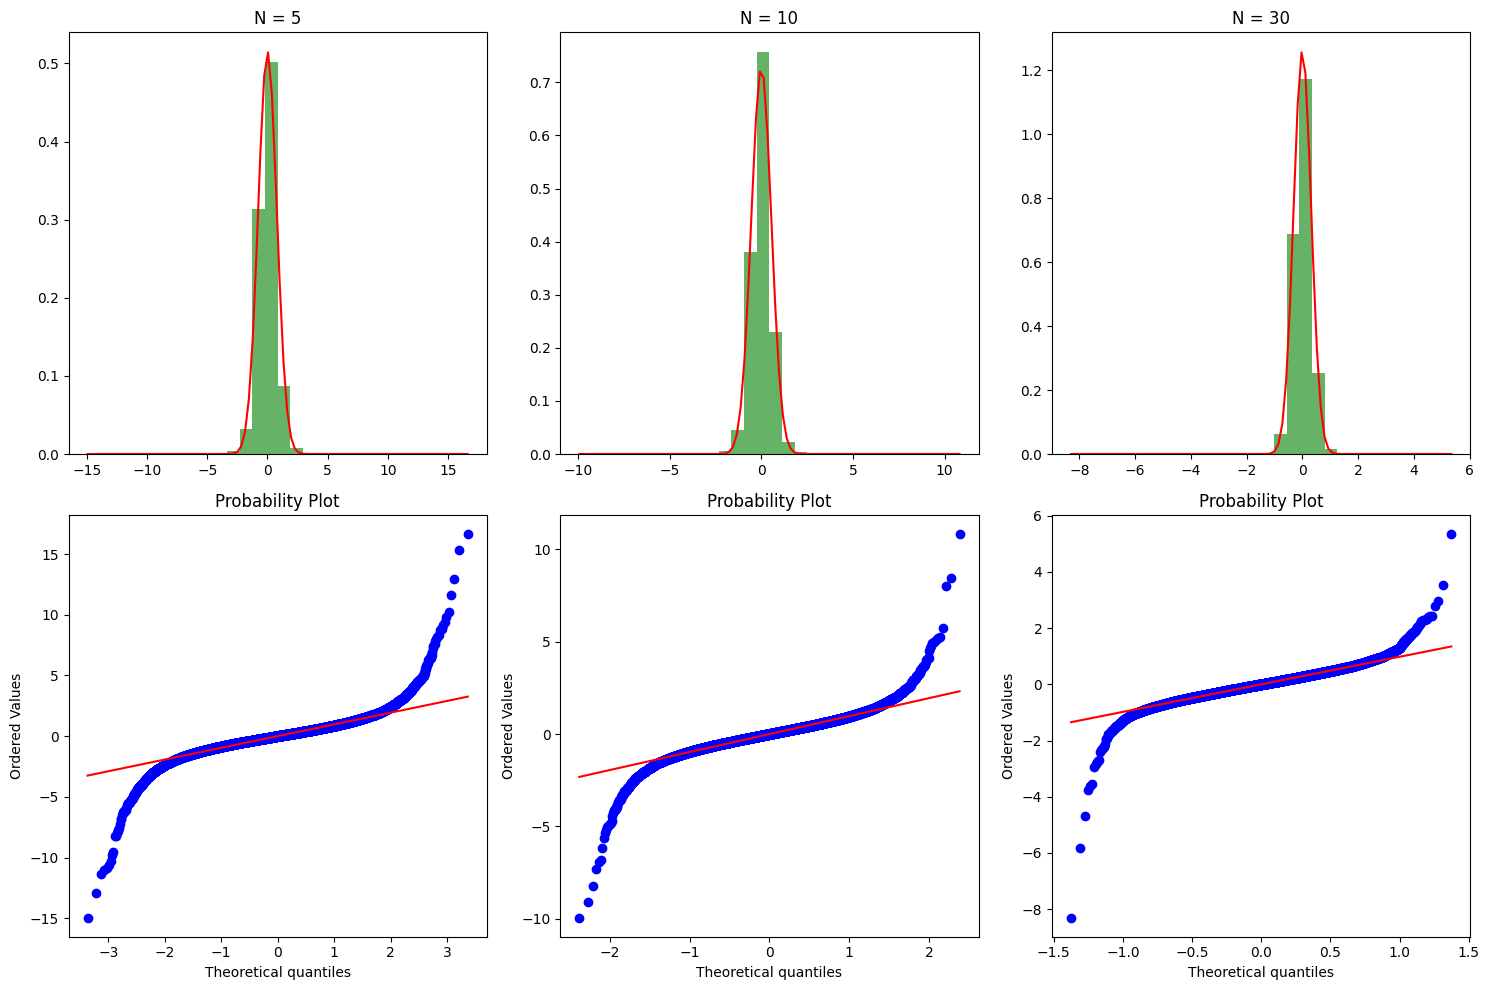

In [3]:

# (a) Create a 2-by-3 array of subplots. Fix k = 3 and instantiate an array N = [5, 10, 30] and a variable size = 100, 000.size = 100, 000.
k = 3 
N = [5, 10, 30]  
size = 100000  

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# (b) Using a for loop, for each value n in N sample a size × n array of samples from the distribution t(k)
for i, n in enumerate(N):
    
    samples = stats.t.rvs(df=k, size=(size, n))

    # (c) Compute the sample average along each row (i.e. you should get size sample averages), and plot their histogram in a subplot.
    sample_means = samples.mean(axis=1)

    axs[0, i].hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    axs[0, i].set_title(f'N = {n}')

    #(d) Over the histogram (i.e. in the same subplot), plot the approximate density of the distribution of sample averages which is given by the CLT as described above.
    
    mean = 0 # mean of t-distribution is 0
    variance = k / (k - 2) / n  # variance as given by CLT
    x = np.linspace(min(sample_means), max(sample_means), 100)
    axs[0, i].plot(x, stats.norm.pdf(x, mean, np.sqrt(variance)), 'r')

    # (e) In a separate subplot, display the QQ plot of the sample means versus their approximate distribution

    stats.probplot(sample_means, dist="norm", sparams=(mean, np.sqrt(variance)), plot=axs[1, i])

plt.tight_layout()
plt.show()


(e)For which value N is the approximate density of sample means given by the CLT a good approximation
of the actual distribution from which you’ve drawn samples? Briefly justify your answer

After using central limit theorem with student t-distribution we can see that it works better with large sample sizes,like in the example we have sample sizes 5,10,30,the sample gives more accurate results on 30 the largest sample in my observations when its larger it starts looking like a normal distribution.

Download the Dow Jones Industrial Average from Stooq using the following code. Do NOT
make any local copies of your data

In [4]:


data = web.DataReader('^DJI', 'stooq', start='1995-01-01', end='2023-11-14')
data = data.reset_index()
dates = data["Date"]
dow = data["Close"].to_numpy()

In [5]:
print(data.head())


        Date      Open      High       Low     Close       Volume
0 2023-11-14  34581.20  34931.01  34581.20  34827.70  333309169.0
1 2023-11-13  34259.25  34405.84  34205.81  34337.87  248845725.0
2 2023-11-10  34020.82  34310.36  33905.62  34283.10  305324236.0
3 2023-11-09  34163.71  34167.54  33859.77  33891.94  333027530.0
4 2023-11-08  34185.92  34252.75  33996.20  34112.27  282794277.0


(a) Plot this times series.

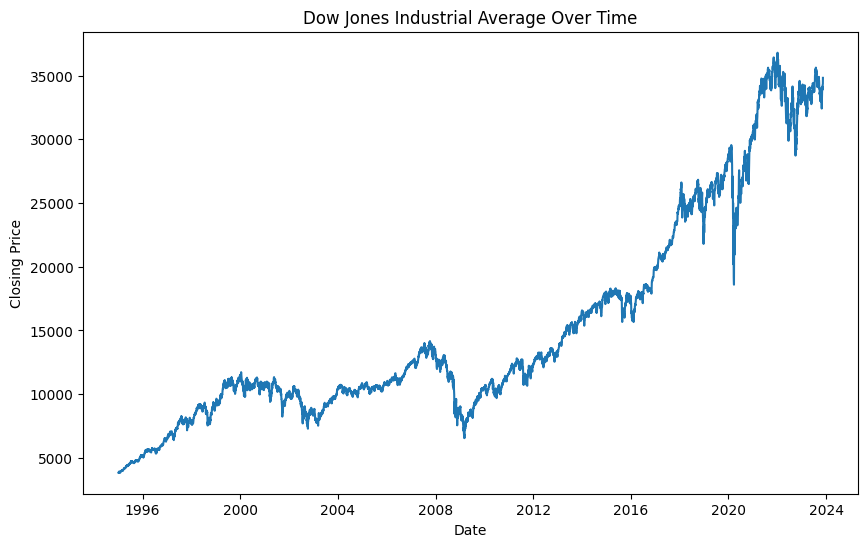

In [6]:


plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'])
plt.title('Dow Jones Industrial Average Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


(b) Compute the time series of (percentage) daily returns using the formula
Returnt = 100 ×

Closet
Closet−1
− 1


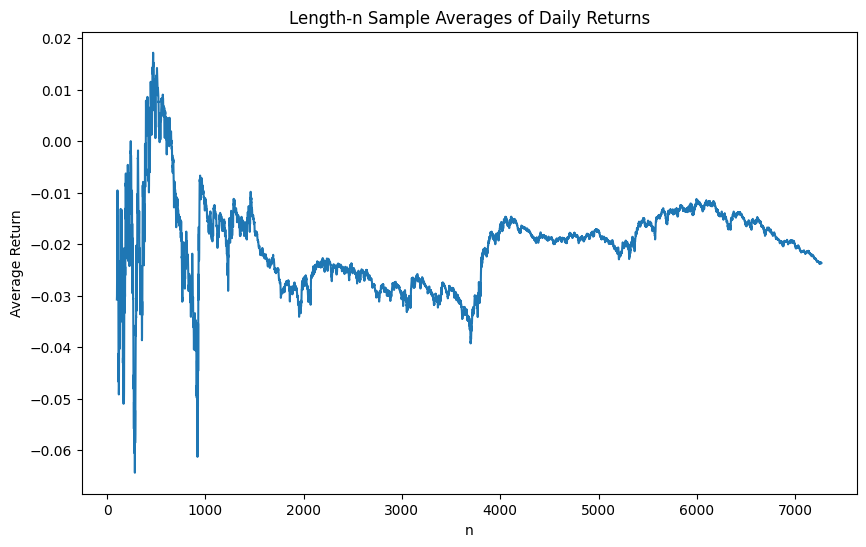

In [7]:
import numpy as np
data['Return'] = 100 * (data['Close'] / data['Close'].shift(1) - 1)
averages = [data['Return'][:n].mean() for n in range(100, len(data))]
plt.figure(figsize=(10, 6))
plt.plot(range(100, len(data)), averages)
plt.title('Length-n Sample Averages of Daily Returns')
plt.xlabel('n')
plt.ylabel('Average Return')
plt.show()


(c) Compute the length-n sample averages of daily returns, starting at the first datapoint, for every
n ≥ 100. Thus the first datapoint in this time series will be the average of the first 100 daily returns,
the second will be the average of the first 101 daily returns, etc., and the last will be the average of
all daily returns. Plot this timeseries. Does it look like it obeys the weak Law of Large Numbers? If
yes explain why, if not explain why this might be the case.

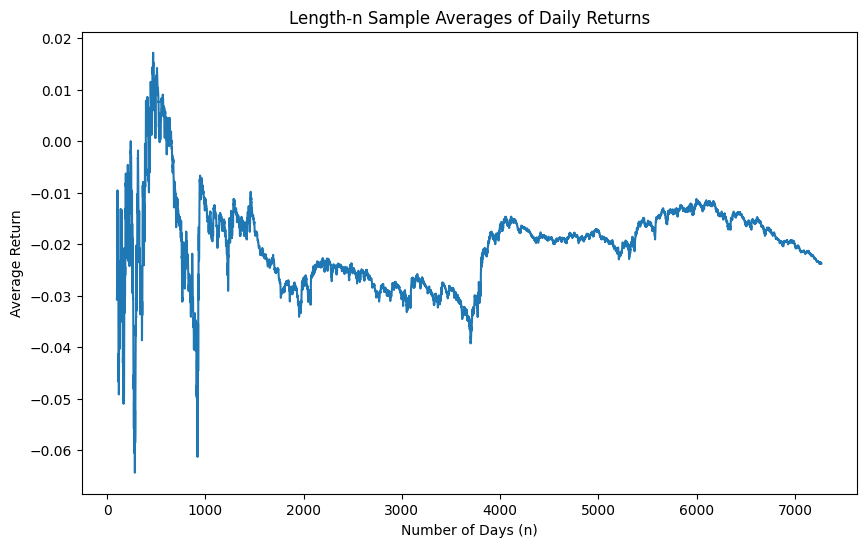

In [8]:
n_min = 100
averages = [data['Return'][:n].mean() for n in range(n_min, len(data['Return']) + 1)]

plt.figure(figsize=(10, 6))
plt.plot(range(n_min, len(data['Return']) + 1), averages)
plt.title('Length-n Sample Averages of Daily Returns')
plt.xlabel('Number of Days (n)')
plt.ylabel('Average Return')
plt.show()


In this graph we can see that this follows weak law of large numbers.We are saying that because for more and more days we can calculate the average return.

(d) Compute the length-100 rolling averages of daily returns. Plot a histogram of these sample averages.
Repeat with length-400 rolling averages. Does it look like these obey the Central Limit Theorem? If
yes explain why, if not explain why this might be the case.


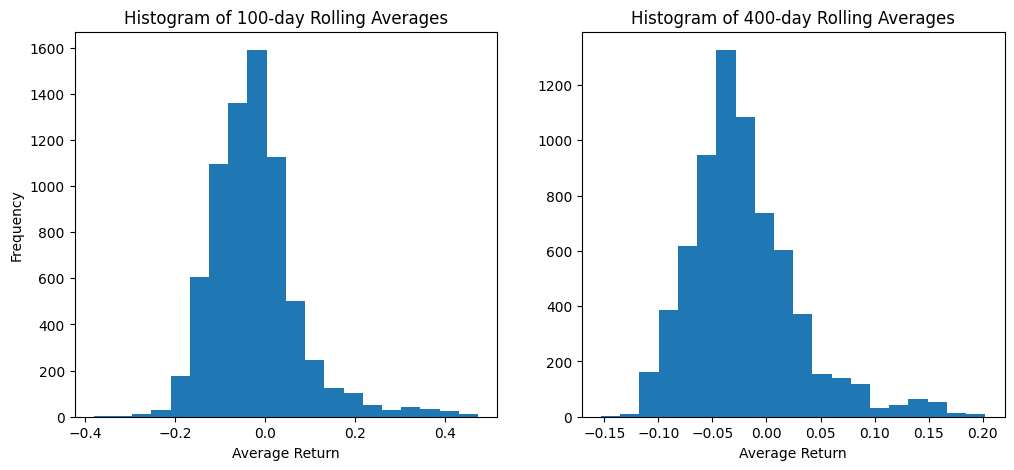

In [9]:
rolling_length_100 = data['Return'].rolling(window=100).mean()
rolling_length_400 = data['Return'].rolling(window=400).mean()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(rolling_length_100.dropna(), bins=20)
plt.title('Histogram of 100-day Rolling Averages')
plt.xlabel('Average Return')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(rolling_length_400.dropna(), bins=20)
plt.title('Histogram of 400-day Rolling Averages')
plt.xlabel('Average Return')
plt.show()


As we can see the shape of graph shows the sign that it obeys the central limit theorem,400 days figure shows more bell shape than 100 days this concludes it because of large sample size.

(e) Compute the sample mean, variance, skewness and kurtosis of the daily returns. Based on this
information, suggest which family of distributions might model these daily returns. Briefly justify
your choice.


In [10]:
mean_return_data = data['Return'].mean()
variance_return_data = data['Return'].var()
skewness_return_data = skew(data['Return'].dropna())
kurtosis_return_data = kurtosis(data['Return'].dropna())

print("Mean:", mean_return_data)
print("Variance:", variance_return_data)
print("Skewness:", skewness_return_data)
print("Kurtosis:", kurtosis_return_data)


Mean: -0.0237229554101248
Variance: 1.3282496804110615
Skewness: 0.6480631209171596
Kurtosis: 12.97781454831144


(f) For this choice of family, you will now estimate the parameter(s) which best explain the data using
the Maximum Likelihood Estimator approach. To achieve this:
• Implement the function which needs to be maximized (this was explained in the lectures). The
parameter(s) which you are trying to estimate must of course be inputs to this function.
• Using the minimize function from scipy.optimize, find the optimal parameters. (Hint: maximizing f(x) is the same thing as minimizing −f(x)). You can use any of the actual minimization
methods, as long as it gives you a sensible answer.
• Once you have found the optimal parameters, plot the PDF of your optimal distribution against
a histogram of the daily returns.

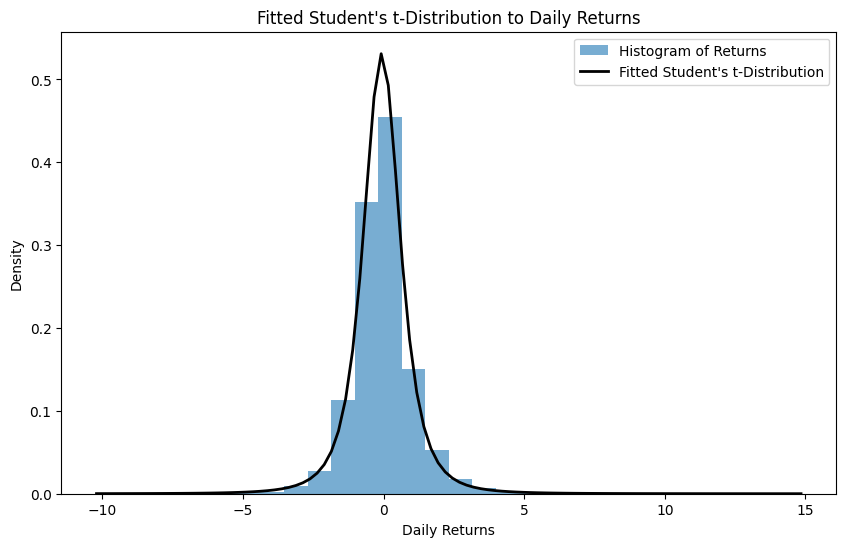

In [11]:
def negative_likelihood(params):
    nu, mu, sigma = params
    likelihood = t(df=nu, loc=mu, scale=sigma).pdf(data['Return'].dropna())
    return -np.sum(np.log(likelihood))
start_params = [10, mean_return_data, np.sqrt(variance_return_data)]  # Initial guess for degrees of freedom, mean, and std
result = minimize(negative_likelihood, start_params, method='Nelder-Mead')
optimal_nu, optimal_mu, optimal_sigma = result.x
x = np.linspace(min(data['Return'].dropna()), max(data['Return'].dropna()), 100)
pdf = t.pdf(x, df=optimal_nu, loc=optimal_mu, scale=optimal_sigma)

plt.figure(figsize=(10, 6))
plt.hist(data['Return'].dropna(), bins=30, density=True, alpha=0.6, label='Histogram of Returns')
plt.plot(x, pdf, 'k', linewidth=2, label='Fitted Student\'s t-Distribution')
plt.title('Fitted Student\'s t-Distribution to Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()


(g) Check the results you obtained in the previous step by comparing it with the parameters you obtain
from scipy’s fit function. Again, plot the PDF of the distribution with these parameters against a
histogram of the daily returns.

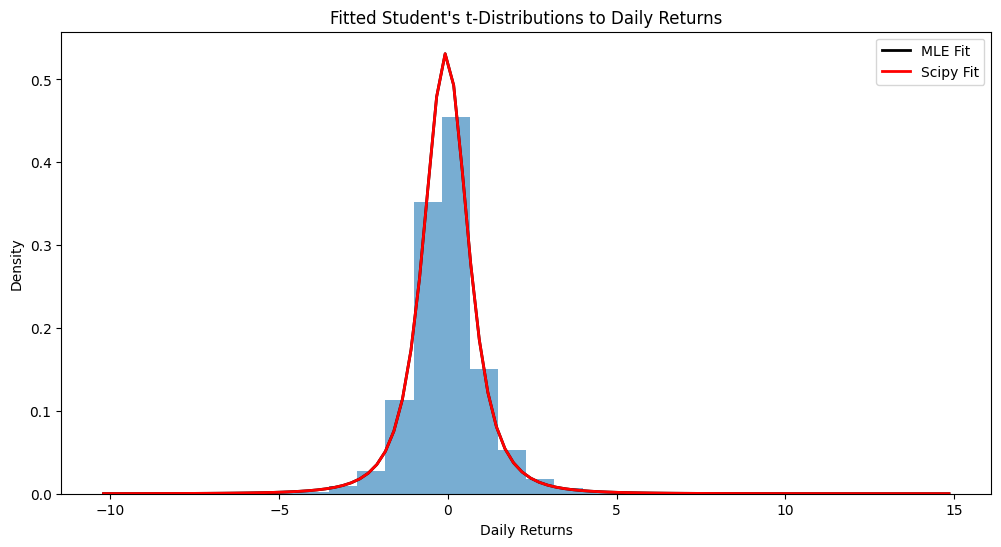

In [12]:
param_fit = t.fit(data['Return'].dropna())
x = np.linspace(min(data['Return'].dropna()), max(data['Return'].dropna()), 100)
pdf_mle = t.pdf(x, df=optimal_nu, loc=optimal_mu, scale=optimal_sigma)
pdf_fit = t.pdf(x, *param_fit)

plt.figure(figsize=(12, 6))
plt.hist(data['Return'].dropna(), bins=30, density=True, alpha=0.6)
plt.plot(x, pdf_mle, 'k', linewidth=2, label='MLE Fit')
plt.plot(x, pdf_fit, 'r', linewidth=2, label='Scipy Fit')
plt.title('Fitted Student\'s t-Distributions to Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()
